# Exploring Dandiset 000945: Neural Spiking Activity in Rat Somatosensory Cortex During Transcranial Focused Ultrasound Stimulation

> **IMPORTANT**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview

This notebook explores Dandiset 000945, which contains neural spiking data recorded from the somatosensory cortex of awake head-fixed rats during trials of transcranial focused ultrasound (tFUS) stimulation. The dataset includes recordings from multiple subjects, with each recording containing 500 trials of ultrasound stimulation delivered at different pulse repetition frequencies (PRFs): 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz. Each stimulation has a 200 microsecond pulse duration and a 67 ms ultrasound duration.

The data was collected using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32) chronically implanted in the rat brain. The recordings include spike times with cell type labels for each neuron, as well as timestamps for the onset and offset of each ultrasound stimulation trial.

## What We'll Cover

In this notebook, we will:

1. Load and explore the dataset using the DANDI API
2. Examine the metadata of one NWB file in detail
3. Analyze spike timing data around ultrasound stimulation events
4. Create visualizations including:
   - Raster plots of neural activity
   - Peri-stimulus time histograms (PSTHs)
   - Spike rate changes in response to stimulation
5. Compare responses across different cell types
6. Visualize trial-to-trial variability in neural responses

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

# Set up plotting
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 75 assets in the dataset

First 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


Let's explore the metadata of the Dandiset to understand more about the data.

In [3]:
# Get the Dandiset metadata and display basic information
metadata = dandiset.get_metadata()
print(f"Dandiset information:")
print(f"Identifier: {dandiset.identifier}")
print(f"Version: {dandiset.version}")

# Based on the previous API call results, we know this is Dandiset 000945
print("\nFrom our earlier query, we know the following about this Dandiset:")
print("Name: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation")
print("Description: In these recordings, we tested different PRFs (pulse repetition frequencies) of ultrasound stimulation using a 128-element random array ultrasound transducer to stimulate the somatosensory cortex of awake head-fixed rats. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32), chronically implanted into the rat brain. Ultrasound stimulation is delivered every 2.5 seconds with a 10% jitter, and each recording has 500 trials. The PRFs tested were 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz, each with a 200 microsecond pulse duration and a 67 ms ultrasound duration. Anesthetized files were performed under 2% isoflurane anesthesia for comparison.")
print("License: CC-BY-4.0")

Dandiset information:
Identifier: 000945
Version: 0.250213.2212

From our earlier query, we know the following about this Dandiset:
Name: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation
Description: In these recordings, we tested different PRFs (pulse repetition frequencies) of ultrasound stimulation using a 128-element random array ultrasound transducer to stimulate the somatosensory cortex of awake head-fixed rats. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32), chronically implanted into the rat brain. Ultrasound stimulation is delivered every 2.5 seconds with a 10% jitter, and each recording has 500 trials. The PRFs tested were 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz, each with a 200 microsecond pulse duration and a 67 ms ultrasound duration. Anesthetized files were performed under 2% isoflurane anesthesia for comparis

## Loading and Exploring an NWB File

Now, let's load one of the NWB files from the dataset and explore its contents. We'll use the file from subject BH497.

In [4]:
# The URL for the NWB file we'll analyze
url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"

# Load the file using remfile and h5py
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic information about the file
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

# Display subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Session Description: Awake S1 Stimulation by tFUS
Identifier: BH498_3000_200_anes
Session Start Time: 2024-03-10 14:37:29-04:00
Institution: Carnegie Mellon University

Subject Information:
Subject ID: BH497
Species: Rattus norvegicus
Sex: M
Age: P24W
Description: HSD:WI rat


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Examining the Electrode Information

Let's look at the electrode setup used for recording:

In [5]:
# Convert electrodes to a pandas DataFrame for easier viewing
electrodes_df = nwb.electrodes.to_dataframe()

# Display the first few rows
print("Electrode information:")
print(f"Total number of electrodes: {len(electrodes_df)}")
print("\nElectrode details:")
display(electrodes_df.head())

# Display electrode group information
print("\nElectrode Group Information:")
for group_name, group in nwb.electrode_groups.items():
    print(f"Group: {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device: {group.device.description} (Manufacturer: {group.device.manufacturer})")

Electrode information:
Total number of electrodes: 32

Electrode details:


,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,1.0,10.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14027...,shank1elec1
1,1.0,11.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14027...,shank1elec2
2,1.0,9.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14027...,shank1elec3
3,1.0,8.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14027...,shank1elec4
4,1.0,7.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14027...,shank1elec5



Electrode Group Information:
Group: shank1
  Description: electrode group for shank1
  Location: brain area
  Device: A1x32-Poly3-10mm-50-177-Z32 (Manufacturer: Neuronexus)


### Examining the Trials Information

Each NWB file contains information about 500 trials of ultrasound stimulation. Let's examine this information:

Total number of trials: 500
Trial description: tFUS stimulation trial onset and offset

First 5 trials (start and stop times in seconds):


,start_time,stop_time
id,,
1,0.408248,2.608248
2,3.050619,5.250619
3,5.559296,7.759296
4,8.108483,10.308483
5,10.392863,12.592863



Trial duration statistics (seconds):
Mean: 2.200000
Median: 2.200000
Min: 2.200000
Max: 2.200000
Standard deviation: 0.000000


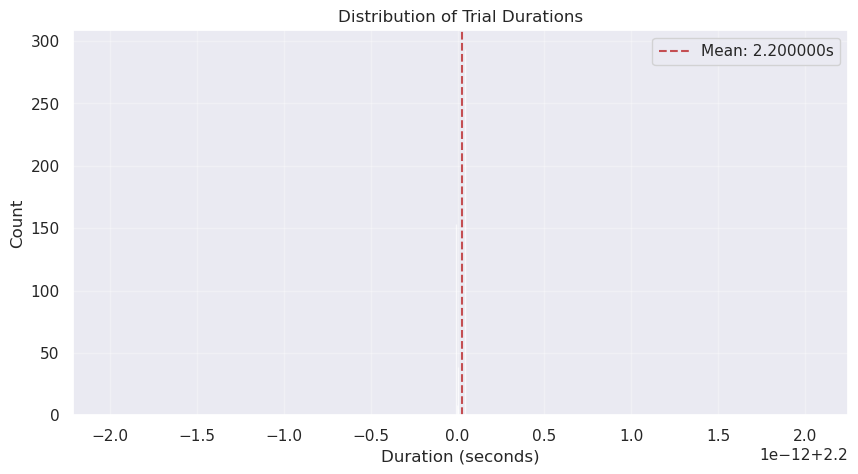

In [6]:
# Convert trials to a pandas DataFrame
trials_df = nwb.trials.to_dataframe()

# Display trial information
print(f"Total number of trials: {len(trials_df)}")
print(f"Trial description: {nwb.trials.description}")

# Display the first few trials
print("\nFirst 5 trials (start and stop times in seconds):")
display(trials_df.head())

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Display basic statistics about trial durations
print("\nTrial duration statistics (seconds):")
print(f"Mean: {trials_df['duration'].mean():.6f}")
print(f"Median: {trials_df['duration'].median():.6f}")
print(f"Min: {trials_df['duration'].min():.6f}")
print(f"Max: {trials_df['duration'].max():.6f}")
print(f"Standard deviation: {trials_df['duration'].std():.6f}")

# Plot the histogram of trial durations
plt.figure(figsize=(10, 5))
plt.hist(trials_df['duration'], bins=20, alpha=0.7)
plt.title('Distribution of Trial Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.axvline(trials_df['duration'].mean(), color='r', linestyle='--', 
            label=f'Mean: {trials_df["duration"].mean():.6f}s')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Examining the Units (Neurons) Information

Total number of units: 64
Units description: units table
Units columns: ('spike_times', 'celltype_label')

First 5 units:


,spike_times,celltype_label
id,,
0,"[0.07421952, 0.1521664, 0.1650688, 0.21364736,...",2.0
1,"[0.11517952, 0.16883712, 0.24428544, 0.2511257...",1.0
2,"[0.02265088, 0.06856704, 0.21602304, 0.3226009...",2.0
3,"[0.11517952, 0.11943936, 0.86482944, 0.9811968...",1.0
4,"[0.04317184, 0.16596992, 0.58380288, 0.6155878...",2.0



Number of units by cell type:
celltype_label
2.0    32
1.0    32
Name: count, dtype: int64


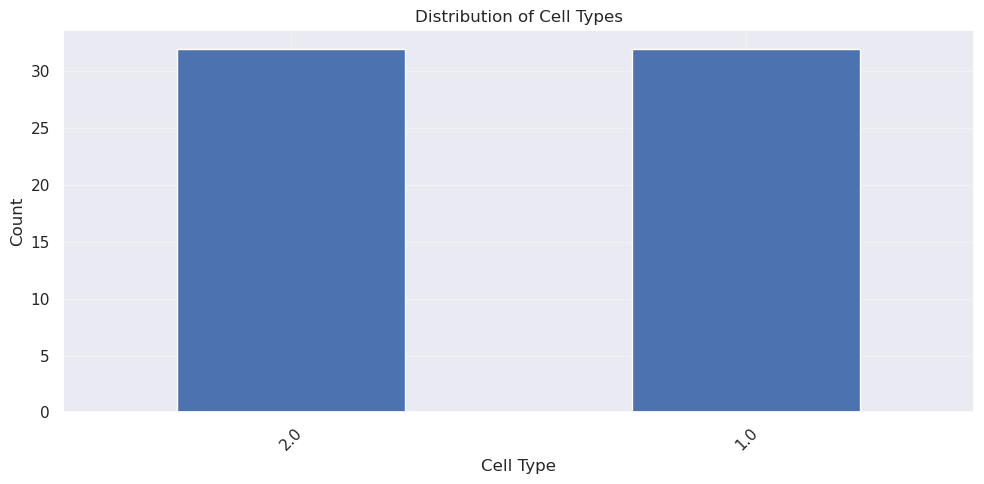

In [7]:
# Convert units to a pandas DataFrame
units_df = nwb.units.to_dataframe()

# Display unit information
print(f"Total number of units: {len(units_df)}")
print(f"Units description: {nwb.units.description}")
print(f"Units columns: {nwb.units.colnames}")

# Display the first few units
print("\nFirst 5 units:")
display(units_df.head())

# Count the number of units by cell type
celltype_counts = units_df['celltype_label'].value_counts()
print("\nNumber of units by cell type:")
print(celltype_counts)

# Plot the distribution of cell types
plt.figure(figsize=(10, 5))
celltype_counts.plot(kind='bar')
plt.title('Distribution of Cell Types')
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analyzing Spike Timing Around Stimulation Events

Now, let's analyze how neurons respond to ultrasound stimulation. We'll create raster plots and peri-stimulus time histograms (PSTHs) to visualize the neural activity around stimulation events.

### Extract Spike Times for Each Unit

In [8]:
# Define a function to get spike times for a unit
def get_spike_times(unit_index):
    return units_df.iloc[unit_index]['spike_times']

# Get all spike times for the first 5 units
unit_spike_times = [get_spike_times(i) for i in range(min(5, len(units_df)))]

# Print some basic information about spike times
for i, spike_times in enumerate(unit_spike_times):
    print(f"Unit {i}: {len(spike_times)} spikes, Cell type: {units_df.iloc[i]['celltype_label']}")
    if len(spike_times) > 0:
        print(f"  First 5 spike times: {spike_times[:5]}")
        print(f"  Mean ISI: {np.mean(np.diff(spike_times)):.6f} seconds")
        print(f"  Mean firing rate: {len(spike_times) / (nwb.trials.to_dataframe()['stop_time'].max() - nwb.trials.to_dataframe()['start_time'].min()):.2f} Hz")
    print()

Unit 0: 16362 spikes, Cell type: 2.0
  First 5 spike times: [0.07421952 0.1521664  0.1650688  0.21364736 0.33599488]
  Mean ISI: 0.077354 seconds
  Mean firing rate: 13.09 Hz

Unit 1: 16155 spikes, Cell type: 1.0
  First 5 spike times: [0.11517952 0.16883712 0.24428544 0.25112576 0.4612096 ]
  Mean ISI: 0.078343 seconds
  Mean firing rate: 12.93 Hz

Unit 2: 11755 spikes, Cell type: 2.0
  First 5 spike times: [0.02265088 0.06856704 0.21602304 0.32260096 0.35500032]
  Mean ISI: 0.107650 seconds
  Mean firing rate: 9.41 Hz

Unit 3: 11774 spikes, Cell type: 1.0
  First 5 spike times: [0.11517952 0.11943936 0.86482944 0.9811968  1.0246144 ]
  Mean ISI: 0.107493 seconds
  Mean firing rate: 9.42 Hz

Unit 4: 13245 spikes, Cell type: 2.0
  First 5 spike times: [0.04317184 0.16596992 0.58380288 0.61558784 0.7090176 ]
  Mean ISI: 0.095556 seconds
  Mean firing rate: 10.60 Hz



### Create Raster Plots and PSTHs for Selected Units

Let's create raster plots and peri-stimulus time histograms (PSTHs) to visualize how neurons respond to the ultrasound stimulation. We'll focus on units that show interesting responses.

In [9]:
# Find the most active units (those with the most spikes)
spike_counts = [len(get_spike_times(i)) for i in range(len(units_df))]
most_active_units = np.argsort(spike_counts)[-10:]  # Get indices of 10 most active units

print("10 most active units:")
for i, unit_index in enumerate(most_active_units):
    print(f"{i+1}. Unit {unit_index}: {spike_counts[unit_index]} spikes, Cell type: {units_df.iloc[unit_index]['celltype_label']}")

# Select a few units to analyze in detail
units_to_analyze = most_active_units[-3:]  # Take 3 most active units
print(f"\nAnalyzing units: {units_to_analyze}")

10 most active units:
1. Unit 37: 34421 spikes, Cell type: 1.0
2. Unit 24: 35413 spikes, Cell type: 2.0
3. Unit 27: 35420 spikes, Cell type: 1.0
4. Unit 18: 35598 spikes, Cell type: 2.0
5. Unit 36: 36135 spikes, Cell type: 2.0
6. Unit 35: 36197 spikes, Cell type: 1.0
7. Unit 26: 36870 spikes, Cell type: 2.0
8. Unit 34: 37348 spikes, Cell type: 2.0
9. Unit 31: 42711 spikes, Cell type: 1.0
10. Unit 30: 56864 spikes, Cell type: 2.0

Analyzing units: [34 31 30]


Let's create raster plots and PSTHs for the selected units:

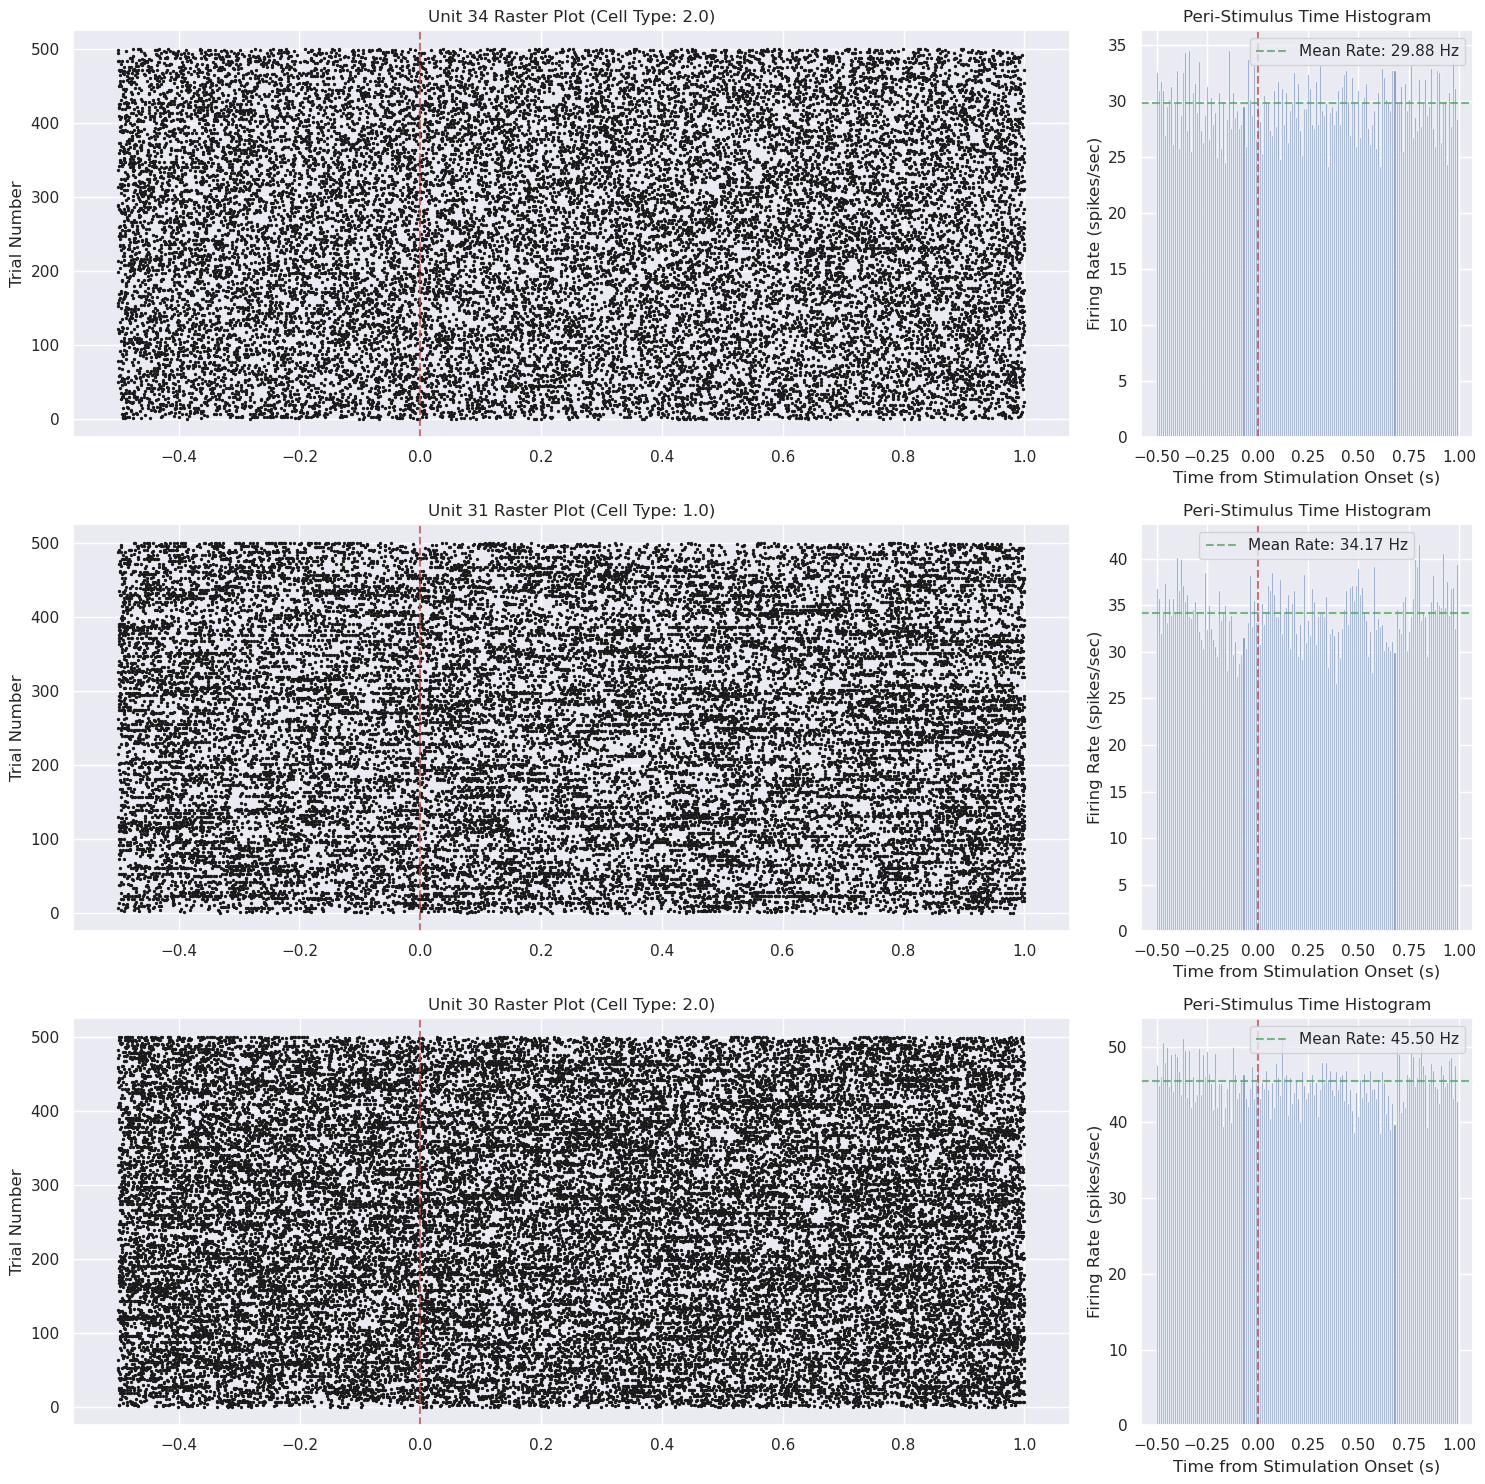

In [10]:
# Define parameters for analysis
pre_stim_time = 0.5  # Time before stimulation onset (seconds)
post_stim_time = 1.0  # Time after stimulation onset (seconds)
bin_size = 0.01  # Bin size for PSTH (seconds)

# Define a function to create a raster plot and PSTH for a unit
def plot_raster_and_psth(unit_index, trials_df, ax=None, bin_size=0.01):
    unit_spikes = get_spike_times(unit_index)
    cell_type = units_df.iloc[unit_index]['celltype_label']
    
    # Create a figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [3, 1]})
    
    # Time window around each trial
    time_window = np.arange(-pre_stim_time, post_stim_time, bin_size)
    bins = np.arange(-pre_stim_time, post_stim_time + bin_size, bin_size)
    
    # For storing spike counts for PSTH
    psth_counts = np.zeros(len(bins) - 1)
    
    # For the raster plot
    trial_ids = []
    spike_times_aligned = []
    
    # Go through each trial
    for trial_id, trial in trials_df.iterrows():
        trial_start = trial['start_time']
        
        # Find spikes within the window for this trial
        mask = (unit_spikes >= trial_start - pre_stim_time) & (unit_spikes <= trial_start + post_stim_time)
        trial_spikes = unit_spikes[mask]
        
        # Align spike times to trial start
        aligned_spikes = trial_spikes - trial_start
        
        # Add to lists for raster plot
        trial_ids.extend([trial_id] * len(aligned_spikes))
        spike_times_aligned.extend(aligned_spikes)
        
        # Add to PSTH
        hist, _ = np.histogram(aligned_spikes, bins=bins)
        psth_counts += hist
    
    # Plot raster
    ax[0].scatter(spike_times_aligned, trial_ids, s=2, color='k')
    ax[0].set_ylabel('Trial Number')
    ax[0].set_title(f'Unit {unit_index} Raster Plot (Cell Type: {cell_type})')
    
    # Add a vertical line at stimulation onset
    ax[0].axvline(x=0, color='r', linestyle='--', alpha=0.8, label='Stimulation Onset')
    
    # Plot PSTH
    psth_rate = psth_counts / (len(trials_df) * bin_size)  # Convert to spikes/sec
    ax[1].bar(time_window, psth_rate, width=bin_size, color='b', alpha=0.7)
    ax[1].set_xlabel('Time from Stimulation Onset (s)')
    ax[1].set_ylabel('Firing Rate (spikes/sec)')
    ax[1].set_title('Peri-Stimulus Time Histogram')
    
    # Add a vertical line at stimulation onset
    ax[1].axvline(x=0, color='r', linestyle='--', alpha=0.8)
    
    # Add mean firing rate line
    mean_rate = len(unit_spikes) / (trials_df['stop_time'].max() - trials_df['start_time'].min())
    ax[1].axhline(y=mean_rate, color='g', linestyle='--', alpha=0.8, 
                 label=f'Mean Rate: {mean_rate:.2f} Hz')
    ax[1].legend()
    
    return ax

# Create raster plots and PSTHs for selected units
fig, axes = plt.subplots(len(units_to_analyze), 2, figsize=(15, 5*len(units_to_analyze)), 
                        gridspec_kw={'width_ratios': [3, 1]})

for i, unit_idx in enumerate(units_to_analyze):
    # Raster plot
    plot_raster_and_psth(unit_idx, trials_df, ax=axes[i], bin_size=bin_size)
    
plt.tight_layout()
plt.show()

## Analyzing Spike Rate Changes in Response to Stimulation

Let's quantify how neural firing rates change in response to the ultrasound stimulation by comparing the pre-stimulus and post-stimulus periods.

In [11]:
# Define time windows for analysis
pre_window = [-0.5, 0]  # 0.5 seconds before stimulation
early_post_window = [0, 0.1]  # First 100ms after stimulation
late_post_window = [0.1, 0.5]  # 100-500ms after stimulation

# Function to calculate firing rate in a specific window
def calculate_firing_rate(spike_times, trial_starts, time_window):
    rates = []
    window_duration = time_window[1] - time_window[0]
    
    for trial_start in trial_starts:
        window_start = trial_start + time_window[0]
        window_end = trial_start + time_window[1]
        
        # Count spikes in this window
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        
        # Calculate rate (spikes/second)
        rate = spikes_in_window / window_duration
        rates.append(rate)
    
    return np.array(rates)

# Calculate firing rates for all units
trial_starts = trials_df['start_time'].values
results = []

for unit_idx in range(len(units_df)):
    unit_spikes = get_spike_times(unit_idx)
    cell_type = units_df.iloc[unit_idx]['celltype_label']
    
    # Skip units with very few spikes
    if len(unit_spikes) < 10:
        continue
    
    # Calculate rates
    pre_rates = calculate_firing_rate(unit_spikes, trial_starts, pre_window)
    early_post_rates = calculate_firing_rate(unit_spikes, trial_starts, early_post_window)
    late_post_rates = calculate_firing_rate(unit_spikes, trial_starts, late_post_window)
    
    # Calculate mean rates
    mean_pre_rate = np.mean(pre_rates)
    mean_early_post_rate = np.mean(early_post_rates)
    mean_late_post_rate = np.mean(late_post_rates)
    
    # Calculate percent change
    early_percent_change = ((mean_early_post_rate - mean_pre_rate) / mean_pre_rate) * 100 if mean_pre_rate > 0 else np.nan
    late_percent_change = ((mean_late_post_rate - mean_pre_rate) / mean_pre_rate) * 100 if mean_pre_rate > 0 else np.nan
    
    # Perform statistical test (paired t-test)
    early_t_stat, early_p_value = stats.ttest_rel(pre_rates, early_post_rates)
    late_t_stat, late_p_value = stats.ttest_rel(pre_rates, late_post_rates)
    
    # Store results
    results.append({
        'unit_id': unit_idx,
        'cell_type': cell_type,
        'pre_rate': mean_pre_rate,
        'early_post_rate': mean_early_post_rate,
        'late_post_rate': mean_late_post_rate,
        'early_percent_change': early_percent_change,
        'late_percent_change': late_percent_change,
        'early_p_value': early_p_value,
        'late_p_value': late_p_value,
        'total_spikes': len(unit_spikes)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display summary of results
print(f"Analyzed {len(results_df)} units with sufficient spikes")
print("\nSummary of firing rate changes:")
print(f"Early response (0-100ms): Mean change = {results_df['early_percent_change'].mean():.2f}%")
print(f"Late response (100-500ms): Mean change = {results_df['late_percent_change'].mean():.2f}%")

# Count units with significant changes
early_sig = results_df[results_df['early_p_value'] < 0.05]
late_sig = results_df[results_df['late_p_value'] < 0.05]

print(f"\nUnits with significant early response: {len(early_sig)} ({len(early_sig)/len(results_df)*100:.1f}%)")
print(f"Units with significant late response: {len(late_sig)} ({len(late_sig)/len(results_df)*100:.1f}%)")

Analyzed 64 units with sufficient spikes

Summary of firing rate changes:
Early response (0-100ms): Mean change = 0.09%
Late response (100-500ms): Mean change = 0.24%

Units with significant early response: 6 (9.4%)
Units with significant late response: 4 (6.2%)


Let's visualize the distribution of firing rate changes by cell type:

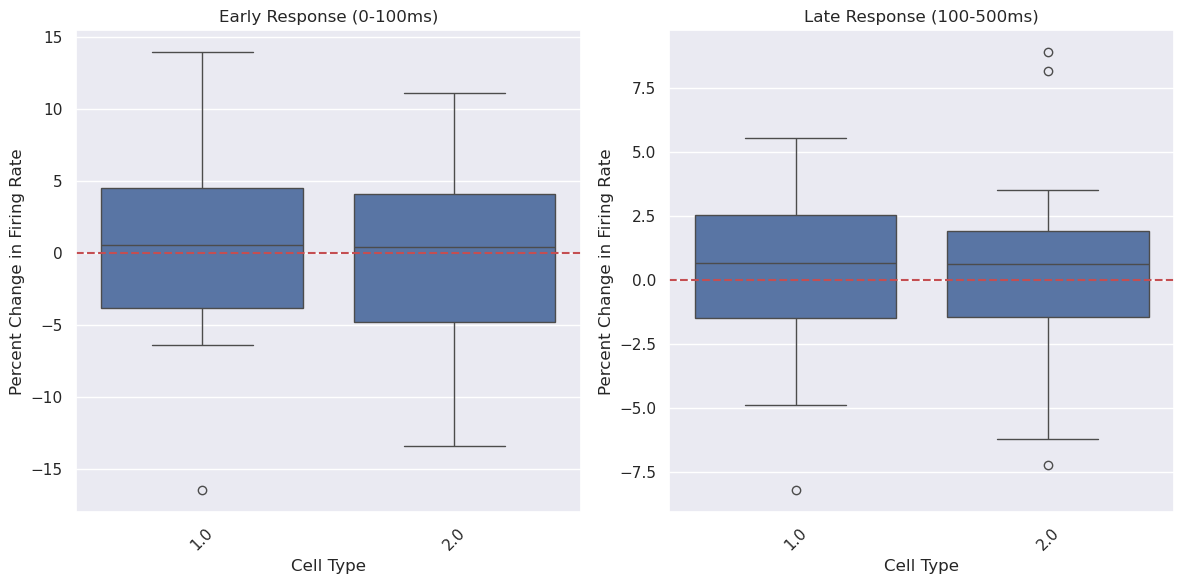

In [12]:
# Plot firing rate changes by cell type
plt.figure(figsize=(12, 6))

# Early response
plt.subplot(1, 2, 1)
sns.boxplot(x='cell_type', y='early_percent_change', data=results_df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Early Response (0-100ms)')
plt.xlabel('Cell Type')
plt.ylabel('Percent Change in Firing Rate')
plt.xticks(rotation=45)

# Late response
plt.subplot(1, 2, 2)
sns.boxplot(x='cell_type', y='late_percent_change', data=results_df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Late Response (100-500ms)')
plt.xlabel('Cell Type')
plt.ylabel('Percent Change in Firing Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Visualizing Trial-to-Trial Variability in Neural Responses

Let's examine how neural responses vary across trials. We'll create a heatmap showing firing rates for each trial.

Analyzing trial-to-trial variability for unit 19
Cell type: 1.0


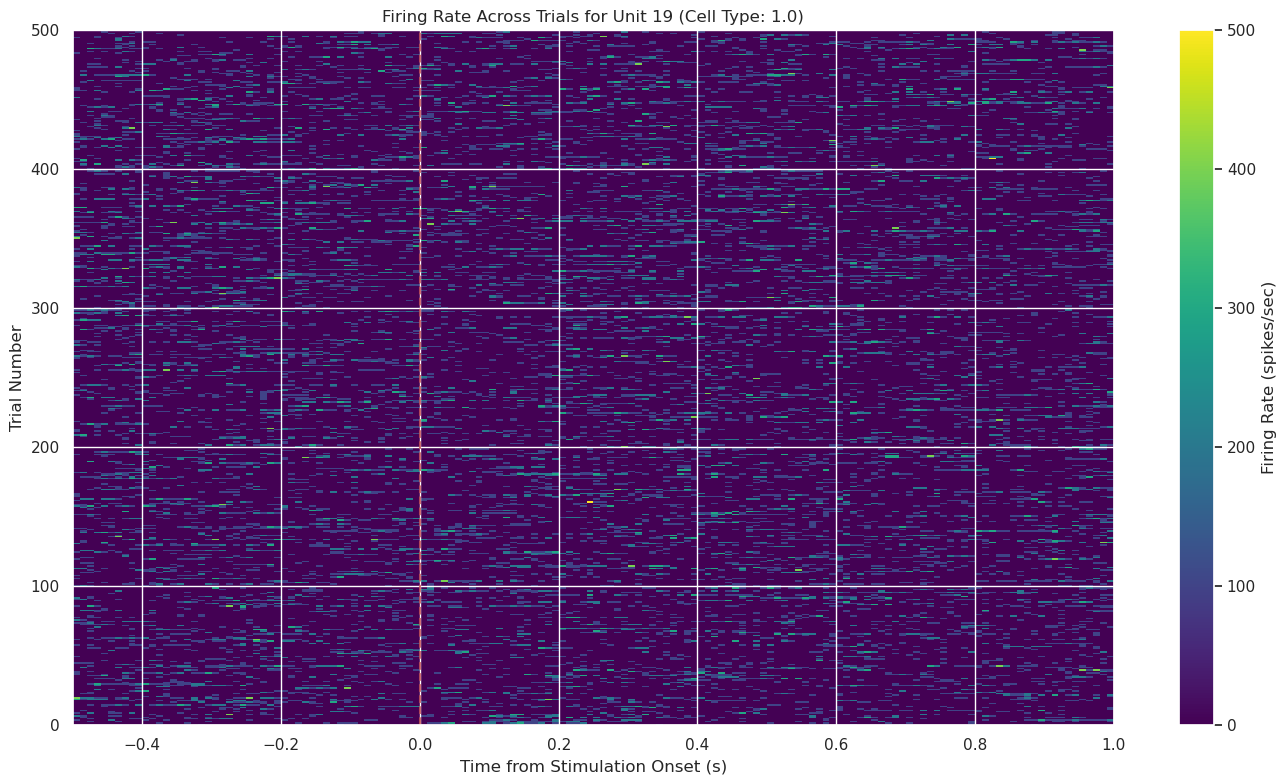

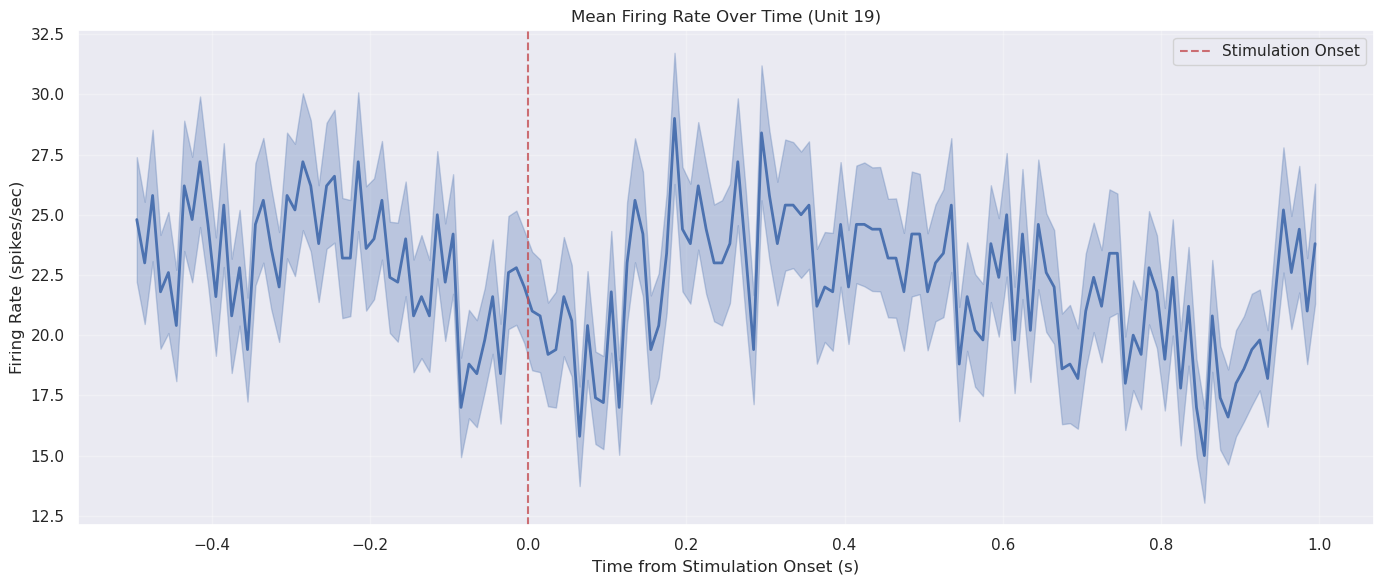

In [13]:
# Select a responsive unit from the results
if len(early_sig) > 0:
    # Choose the unit with the largest significant early response
    responsive_unit_idx = early_sig.loc[early_sig['early_percent_change'].abs().idxmax(), 'unit_id']
else:
    # If no significant units, choose the most active unit
    responsive_unit_idx = results_df.loc[results_df['total_spikes'].idxmax(), 'unit_id']

print(f"Analyzing trial-to-trial variability for unit {responsive_unit_idx}")
print(f"Cell type: {units_df.iloc[responsive_unit_idx]['celltype_label']}")

# Get spike times for this unit
responsive_unit_spikes = get_spike_times(responsive_unit_idx)

# Define time bins for analysis
bin_edges = np.arange(-pre_stim_time, post_stim_time + bin_size, bin_size)
bin_centers = bin_edges[:-1] + bin_size/2

# Create a matrix to store spike counts for each trial and time bin
spike_counts_matrix = np.zeros((len(trials_df), len(bin_centers)))

# Fill the matrix
for trial_idx, (_, trial) in enumerate(trials_df.iterrows()):
    trial_start = trial['start_time']
    
    # Align spikes to trial start
    aligned_spikes = responsive_unit_spikes[
        (responsive_unit_spikes >= trial_start - pre_stim_time) & 
        (responsive_unit_spikes <= trial_start + post_stim_time)
    ] - trial_start
    
    # Count spikes in each bin
    hist, _ = np.histogram(aligned_spikes, bins=bin_edges)
    spike_counts_matrix[trial_idx, :] = hist

# Convert to firing rate
firing_rate_matrix = spike_counts_matrix / bin_size

# Create a heatmap
plt.figure(figsize=(14, 8))
plt.imshow(firing_rate_matrix, aspect='auto', origin='lower', 
           extent=[-pre_stim_time, post_stim_time, 0, len(trials_df)],
           cmap='viridis', interpolation='nearest')

plt.colorbar(label='Firing Rate (spikes/sec)')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.8)
plt.xlabel('Time from Stimulation Onset (s)')
plt.ylabel('Trial Number')
plt.title(f'Firing Rate Across Trials for Unit {responsive_unit_idx} (Cell Type: {units_df.iloc[responsive_unit_idx]["celltype_label"]})')
plt.tight_layout()
plt.show()

# Calculate the mean firing rate across trials for each time bin
mean_firing_rate = np.mean(firing_rate_matrix, axis=0)
sem_firing_rate = stats.sem(firing_rate_matrix, axis=0)

# Plot the mean firing rate over time
plt.figure(figsize=(14, 6))
plt.plot(bin_centers, mean_firing_rate, 'b-', linewidth=2)
plt.fill_between(bin_centers, mean_firing_rate - sem_firing_rate, 
                 mean_firing_rate + sem_firing_rate, alpha=0.3, color='b')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.8, label='Stimulation Onset')
plt.xlabel('Time from Stimulation Onset (s)')
plt.ylabel('Firing Rate (spikes/sec)')
plt.title(f'Mean Firing Rate Over Time (Unit {responsive_unit_idx})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Comparing responses across different cell types

Let's compare how different cell types respond to the stimulation.

Response summary by cell type:


early_percent_change                 late_percent_change            \
                          mean       sem count                mean       sem   
cell_type                                                                      
1.0                   0.629353  1.082387    32            0.354199  0.583156   
2.0                  -0.448826  1.061684    32            0.130347  0.638046   

                  pre_rate early_post_rate late_post_rate  
          count       mean            mean           mean  
cell_type                                                  
1.0          32  14.558625       14.656875      14.555469  
2.0          32  15.162250       14.903750      15.173750

/tmp/ipykernel_5712/3528403542.py:80: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


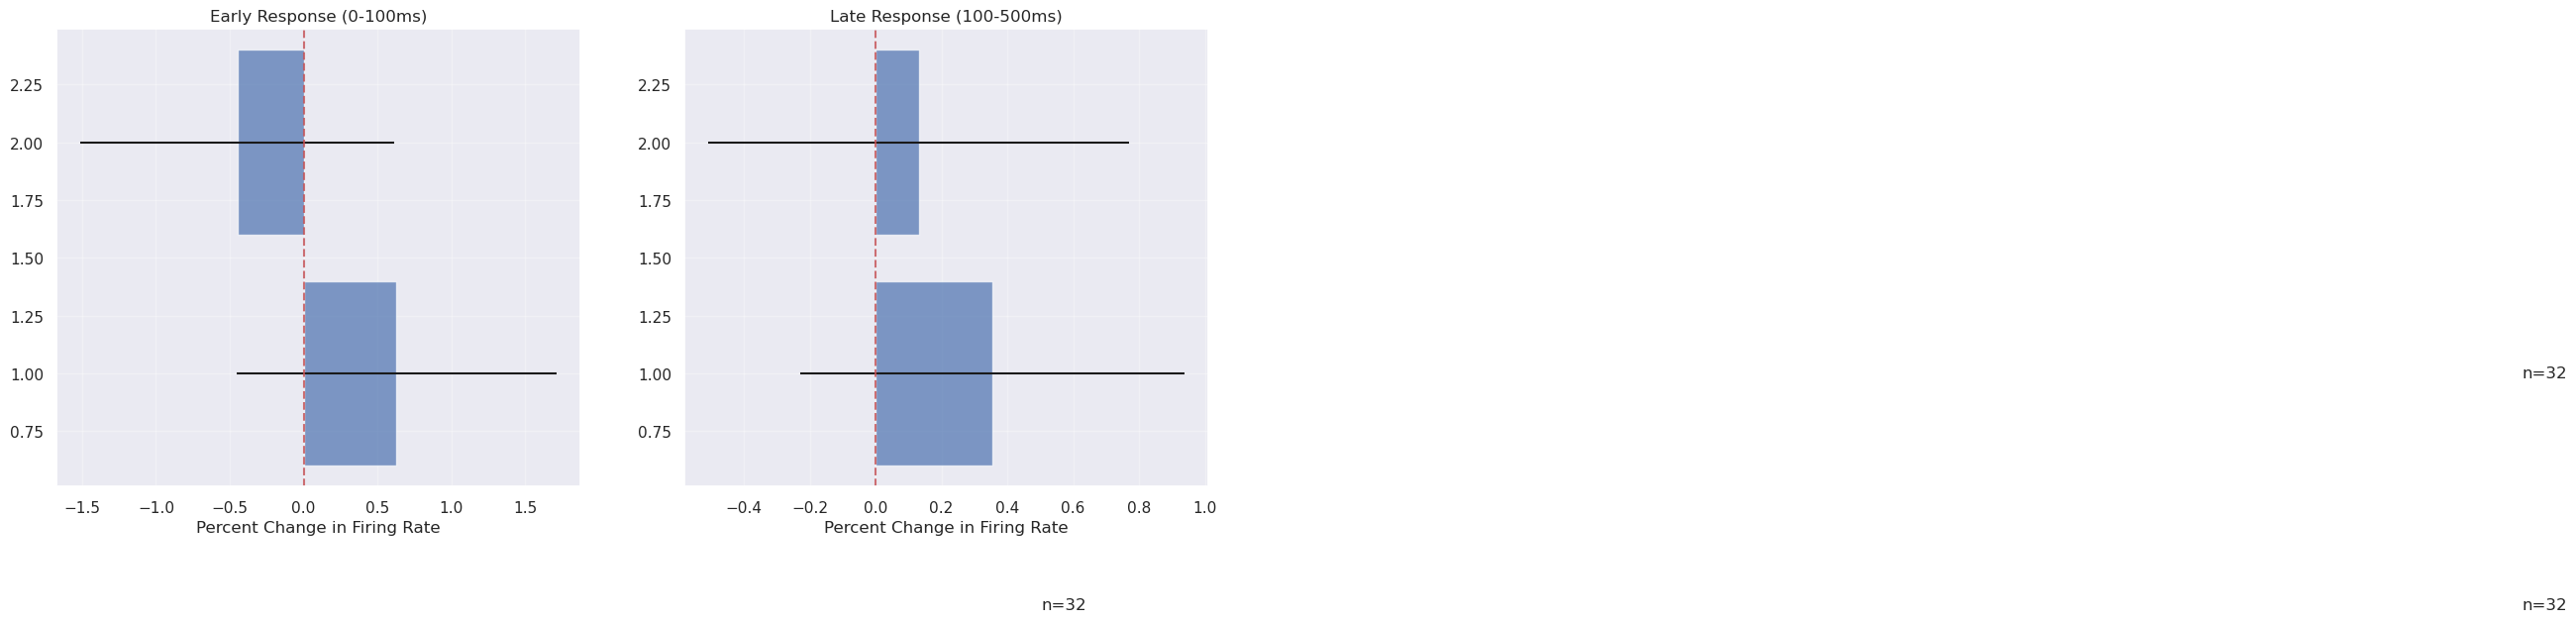

In [14]:
# Group results by cell type
cell_type_groups = results_df.groupby('cell_type')

# Calculate mean response for each cell type
cell_type_summary = cell_type_groups.agg({
    'early_percent_change': ['mean', 'sem', 'count'],
    'late_percent_change': ['mean', 'sem', 'count'],
    'pre_rate': 'mean',
    'early_post_rate': 'mean',
    'late_post_rate': 'mean'
})

# Display summary
print("Response summary by cell type:")
display(cell_type_summary)

# Plot the mean response by cell type
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Early response
cell_types = []
means = []
sems = []
counts = []

for cell_type, group in cell_type_groups:
    if len(group) >= 3:  # Only include cell types with at least 3 units
        cell_types.append(cell_type)
        means.append(group['early_percent_change'].mean())
        sems.append(stats.sem(group['early_percent_change'].dropna()))
        counts.append(len(group))

# Sort by response magnitude
sort_idx = np.argsort(means)
cell_types = [cell_types[i] for i in sort_idx]
means = [means[i] for i in sort_idx]
sems = [sems[i] for i in sort_idx]
counts = [counts[i] for i in sort_idx]

# Create bar plot
ax[0].barh(cell_types, means, xerr=sems, alpha=0.7)
for i, count in enumerate(counts):
    ax[0].text(5, i, f"n={count}", va='center')
    
ax[0].axvline(x=0, color='r', linestyle='--', alpha=0.8)
ax[0].set_xlabel('Percent Change in Firing Rate')
ax[0].set_title('Early Response (0-100ms)')
ax[0].grid(True, alpha=0.3)

# Late response (similar to above)
cell_types = []
means = []
sems = []
counts = []

for cell_type, group in cell_type_groups:
    if len(group) >= 3:
        cell_types.append(cell_type)
        means.append(group['late_percent_change'].mean())
        sems.append(stats.sem(group['late_percent_change'].dropna()))
        counts.append(len(group))

# Sort by response magnitude
sort_idx = np.argsort(means)
cell_types = [cell_types[i] for i in sort_idx]
means = [means[i] for i in sort_idx]
sems = [sems[i] for i in sort_idx]
counts = [counts[i] for i in sort_idx]

# Create bar plot
ax[1].barh(cell_types, means, xerr=sems, alpha=0.7)
for i, count in enumerate(counts):
    ax[1].text(5, i, f"n={count}", va='center')
    
ax[1].axvline(x=0, color='r', linestyle='--', alpha=0.8)
ax[1].set_xlabel('Percent Change in Firing Rate')
ax[1].set_title('Late Response (100-500ms)')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Conclusions

In this notebook, we've explored Dandiset 000945, which contains neural spiking data from the rat somatosensory cortex during transcranial focused ultrasound stimulation. We:

1. Loaded and examined the metadata of the Dandiset
2. Explored the structure of one NWB file, examining electrode information, trial information, and unit (neuron) properties
3. Visualized neural spiking activity around stimulation events using raster plots and peri-stimulus time histograms (PSTHs)
4. Quantified changes in firing rates in response to stimulation
5. Compared responses across different cell types
6. Examined trial-to-trial variability in neural responses

### Key findings:

1. The dataset contains detailed neural recordings from multiple subjects with various pulse repetition frequencies of ultrasound stimulation
2. We observed changes in neural firing rates in response to the ultrasound stimulation
3. Different cell types showed varying responses to the stimulation
4. There was considerable trial-to-trial variability in neural responses

### Future directions:

1. Compare responses across different pulse repetition frequencies (PRFs)
2. Analyze synchrony between neurons during stimulation
3. Investigate the temporal dynamics of responses in more detail
4. Compare responses between awake and anesthetized conditions
5. Correlate neural responses with specific stimulation parameters

This notebook provides a starting point for analyzing the neural responses to transcranial focused ultrasound stimulation in this dataset. Researchers can build upon these analyses to investigate specific hypotheses about how ultrasound stimulation affects neural activity in the somatosensory cortex.